Etape 1 : importation library

In [50]:
from google.colab import files
!pip3 install geopandas
import geopandas as gpd
!pip install liac-arff
import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

!pip install h2o
import h2o
from h2o.automl import H2OAutoML
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

Etape 2 : importation de fichier

In [2]:
uploaded = files.upload()

# lecture des fichiers arff
with open("1year.arff") as f:
    dataDictionary = arff.load(f)
    f.close()

arffData1year = np.array(dataDictionary['data'])

arffData1year

Saving 1year.arff to 1year.arff


array([[0.20055, 0.37951, 0.39641, ..., 4.4158, 7.4277, '0'],
       [0.20912, 0.49988, 0.47225, ..., 3.4, 60.987, '0'],
       [0.24866, 0.69592, 0.26713, ..., 2.7185, 5.2078, '0'],
       ...,
       [0.006338, 0.50276, 0.43923, ..., 7.1542, 62.001, '1'],
       [-0.041643, 0.8481, -0.12852, ..., 1.3939, 0.51005, '1'],
       [0.014946, 0.94648, 0.03211, ..., 3.3599, 35.118, '1']],
      dtype=object)

In [3]:
uploaded = files.upload()

# lecture des fichiers arff
with open("2year.arff") as f:
    dataDictionary = arff.load(f)
    f.close()

arffData2year = np.array(dataDictionary['data'])

arffData2year

Saving 2year.arff to 2year.arff


array([[0.20235, 0.465, 0.24038, ..., 3.3879, 5.344, '0'],
       [0.030073, 0.59563, 0.18668, ..., 0.58619, 1.2381, '0'],
       [0.25786, 0.29949, 0.66519, ..., 5.5969, 47.466, '0'],
       ...,
       [0.015092, 0.55759, -0.2846, ..., 3.1948, 2.4201, '1'],
       [-0.0025542, 0.47076, 0.42401, ..., 5.6773, 25.399, '1'],
       [0.0020717, 0.94315, -0.13474, ..., 1.896, 8.9562, '1']],
      dtype=object)

In [4]:
uploaded = files.upload()

# lecture des fichiers arff
with open("3year.arff") as f:
    dataDictionary = arff.load(f)
    f.close()

arffData3year = np.array(dataDictionary['data'])

arffData3year

Saving 3year.arff to 3year.arff


array([[0.17419, 0.41299, 0.14371, ..., 4.3303, 4.0341, '0'],
       [0.14624, 0.46038, 0.2823, ..., 3.5716, 5.95, '0'],
       [0.00059529, 0.22612, 0.48839, ..., 5.6287, 4.4581, '0'],
       ...,
       [-0.1359, 0.83954, -0.34201, ..., 1.7198, 1.5659, '1'],
       [0.0094225, 0.50028, 0.26163, ..., 3.7154, 7.8068, '1'],
       [-0.0017748, 0.9478, 0.0037286, ..., 2.5857, 12.225, '1']],
      dtype=object)

In [5]:
uploaded = files.upload()

# lecture des fichiers arff
with open("4year.arff") as f:
    dataDictionary = arff.load(f)
    f.close()

arffData4year = np.array(dataDictionary['data'])

arffData4year

Saving 4year.arff to 4year.arff


array([[0.15929, 0.4624, 0.07773, ..., 3.0465, 3.056, '0'],
       [-0.12743, 0.46243, 0.26917, ..., 3.615, 3.4725, '0'],
       [0.070488, 0.2357, 0.52781, ..., 4.7978, 4.7818, '0'],
       ...,
       [-0.23829, 0.62708, 0.090374, ..., 4.1065, 0.79501, '1'],
       [0.097188, 0.753, -0.32768, ..., 1.6818, 1.3191, '1'],
       [0.021416, 0.48678, 0.14894, ..., 3.7085, 4.9295, '1']],
      dtype=object)

In [6]:
uploaded = files.upload()

# lecture des fichiers arff
with open("5year.arff") as f:
    dataDictionary = arff.load(f)
    f.close()

arffData5year = np.array(dataDictionary['data'])

arffData5year

Saving 5year.arff to 5year.arff


array([[0.088238, 0.55472, 0.01134, ..., 2.5568, 3.2597, '0'],
       [-0.006202, 0.48465, 0.23298, ..., 3.2841, 3.37, '0'],
       [0.13024, 0.22142, 0.57751, ..., 5.1027, 5.6188, '0'],
       ...,
       [-0.17905, 1.2553, -0.27599, ..., 1.7559, 9.9527, '1'],
       [-0.10886, 0.74394, 0.015449, ..., 4.3911, 0.95575, '1'],
       [-0.10537, 0.53629, -0.045578, ..., 2.6672, 2.7927, '1']],
      dtype=object)

Etape 3 : mettre les données dans un tableau

In [7]:
arffData1year.shape

(7027, 65)

In [8]:
arffData2year.shape

(10173, 65)

In [9]:
arffData3year.shape

(10503, 65)

In [10]:
arffData4year.shape

(9792, 65)

In [11]:
arffData5year.shape

(5910, 65)

In [12]:
df1year = pd.DataFrame(arffData1year,
                  columns=['net profit / total assets','total liabilities / total assets','working capital / total assets','current assets / short-term liabilities',
                           '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
                           'retained earnings / total assets','EBIT / total assets','book value of equity / total liabilities','sales / total assets','equity / total assets',
                           '(gross profit + extraordinary items + financial expenses) / total assets','gross profit / short-term liabilities','(gross profit + depreciation) / sales',
                           '(gross profit + interest) / total assets','(total liabilities * 365) / (gross profit + depreciation)','(gross profit + depreciation) / total liabilities',
                           'total assets / total liabilities','gross profit / total assets','gross profit / sales','(inventory * 365) / sales','sales (n) / sales (n-1)',
                           'profit on operating activities / total assets','net profit / sales','gross profit (in 3 years) / total assets','(equity - share capital) / total assets',
                           '(net profit + depreciation) / total liabilities','profit on operating activities / financial expenses','working capital / fixed assets',
                           'logarithm of total assets','(total liabilities - cash) / sales','(gross profit + interest) / sales','(current liabilities * 365) / cost of products sold',
                           'operating expenses / short-term liabilities','operating expenses / total liabilities','profit on sales / total assets','total sales / total assets',
                           '(current assets - inventories) / long-term liabilities','constant capital / total assets','profit on sales / sales',
                           '(current assets - inventory - receivables) / short-term liabilities','total liabilities / ((profit on operating activities + depreciation) * (12/365))',
                           'profit on operating activities / sales','rotation receivables + inventory turnover in days','(receivables * 365) / sales','net profit / inventory',
                           '(current assets - inventory) / short-term liabilities','(inventory * 365) / cost of products sold',
                           'EBITDA (profit on operating activities - depreciation) / total assets','EBITDA (profit on operating activities - depreciation) / sales',
                           'current assets / total liabilities','short-term liabilities / total assets','(short-term liabilities * 365) / cost of products sold)','equity / fixed assets',
                           'constant capital / fixed assets','working capital','(sales - cost of products sold) / sales',
                           '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)','total costs /total sales','long-term liabilities / equity',
                           'sales / inventory','sales / receivables','(short-term liabilities *365) / sales','sales / short-term liabilities','sales / fixed assets','bankruptcy'])

df1year

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold),equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.1666,0.24976,497.42,0.73378,2.6349,0.24976,0.14942,43.37,1.2479,0.21402,0.11998,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.14942,94.14,3.8772,0.56393,0.21402,1.741,593.27,0.50591,0.12804,0.66295,0.051402,0.12804,114.42,71.05,1.0097,1.5225,49.394,0.1853,0.11085,2.042,0.37854,0.25792,2.2437,2.248,348690,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0.26114,0.5168,0.15835,0.25834,677.96,0.53838,2.0005,0.25834,0.152,87.981,1.4293,0.24806,0.12304,None,0.39542,0.43992,88.444,16.946,3.6884,0.26969,0.152,122.17,2.9876,2.9876,0.20616,1.6996,None,0.49788,0.1213,0.086422,0.064371,0.14595,199.49,111.51,0.51045,1.1252,100.13,0.23727,0.13961,1.9447,0.49988,0.33472,17.866,17.866,2304.6,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0.31258,0.64184,0.24435,0.30906,794.16,0.45961,1.4369,0.30906,0.2361,73.133,1.4283,0.3026,0.18996,None,0.28932,0.37282,86.011,1.0627,4.3749,0.41929,0.23815,176.93,2.063,1.4274,0.31565,1.309,2.3019,0.51537,0.24114,0.32202,0.07402,0.23117,165.51,92.381,0.94807,1.0101,96.372,0.29181,0.22293,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0

In [13]:
df2year = pd.DataFrame(arffData2year,
                  columns=['net profit / total assets','total liabilities / total assets','working capital / total assets','current assets / short-term liabilities',
                           '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
                           'retained earnings / total assets','EBIT / total assets','book value of equity / total liabilities','sales / total assets','equity / total assets',
                           '(gross profit + extraordinary items + financial expenses) / total assets','gross profit / short-term liabilities','(gross profit + depreciation) / sales',
                           '(gross profit + interest) / total assets','(total liabilities * 365) / (gross profit + depreciation)','(gross profit + depreciation) / total liabilities',
                           'total assets / total liabilities','gross profit / total assets','gross profit / sales','(inventory * 365) / sales','sales (n) / sales (n-1)',
                           'profit on operating activities / total assets','net profit / sales','gross profit (in 3 years) / total assets','(equity - share capital) / total assets',
                           '(net profit + depreciation) / total liabilities','profit on operating activities / financial expenses','working capital / fixed assets',
                           'logarithm of total assets','(total liabilities - cash) / sales','(gross profit + interest) / sales','(current liabilities * 365) / cost of products sold',
                           'operating expenses / short-term liabilities','operating expenses / total liabilities','profit on sales / total assets','total sales / total assets',
                           '(current assets - inventories) / long-term liabilities','constant capital / total assets','profit on sales / sales',
                           '(current assets - inventory - receivables) / short-term liabilities','total liabilities / ((profit on operating activities + depreciation) * (12/365))',
                           'profit on operating activities / sales','rotation receivables + inventory turnover in days','(receivables * 365) / sales','net profit / inventory',
                           '(current assets - inventory) / short-term liabilities','(inventory * 365) / cost of products sold',
                           'EBITDA (profit on operating activities - depreciation) / total assets','EBITDA (profit on operating activities - depreciation) / sales',
                           'current assets / total liabilities','short-term liabilities / total assets','(short-term liabilities * 365) / cost of products sold)','equity / fixed assets',
                           'constant capital / fixed assets','working capital','(sales - cost of products sold) / sales',
                           '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)','total costs /total sales','long-term liabilities / equity',
                           'sales / inventory','sales / receivables','(short-term liabilities *365) / sales','sales / short-term liabilities','sales / fixed assets','bankruptcy'])

df2year

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold),equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy
0,0.20235,0.465,0.24038,1.5171,-14.547,0.51069,0.25366,0.91816,1.1519,0.42695,0.25366,0.54561,0.17865,0.25366,603.2,0.60511,2.1505,0.25366,0.16105,42.697,1.0806,0.22349,0.12848,0.63105,0.42695,0.49478,1.6345,0.81559,6.0038,0.22803,0.16105,124.1,2.9412,0.48063,0.22349,1.6258,5095.3,0.42705,0.1419,0.46489,0.060856,0.1419,113.36,70.661,1.0983,1.1207,49.181,0.19577,0.1243,1.5167,0.4649,0.34,1.4486,1.449,242500,0.13184,0.47395,0.86816,0.00023951,8.5487,5.1655,107.74,3.3879,5.344,0
1,0.030073,0.59563,0.18668,1.3382,-37.859,-0.00031864,0.04167,0.6789,0.32356,0.40437,0.042199,0.075493,0.14563,0.04167,4613.9,0.079109,1.6789,0.04167,0.12878,239.12,None,0.042196,0.092943,None,0.029802,0.059639,79.752,0.71432,4.0672,1.8052,0.12878,708.74,0.51499,0.47725,0.039298,0.32356,None,0.40437,0.12146,0.028211,0.41671,0.13041,815.69,576.57,0.14187,0.95419,272.17,0.036746,0.11357,1.2401,0.55197,1.9418,1.5473,1.5473,2179.5,0.12146,0.074369,0.87235,0,1.5264,0.63305,622.66,0.58619,1.2381,0
2,0.25786,0.29949,0.66519,3.2211,71.799,0,0.31877,2.332,1.6762,0.69841,0.32453,1.0644,0.19745,0.31877,330.29,1.1051,3.339,0.31877,0.19017,84.246,1.1146,0.30466,0.15383,None,0.60775,0.90169,52.886,18.836,3.7415,0.14756,0.19021,78.101,4.6734,4.6734,0.27656,1.6762,None,0.69841,0.16499,0.17942,0.031507,0.18175,198.36,114.11,0.66649,1.9292,100.89,0.29247,0.17448,3.2211,0.29949,0.21398,19.777,19.777,3668.6,0.16499,0.36921,0.81614,0,4.3325,3.1985,65.215,5.5969,47.466,0
3,0.22716,0.6785,0.

In [14]:
df3year = pd.DataFrame(arffData3year,
                  columns=['net profit / total assets','total liabilities / total assets','working capital / total assets','current assets / short-term liabilities',
                           '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
                           'retained earnings / total assets','EBIT / total assets','book value of equity / total liabilities','sales / total assets','equity / total assets',
                           '(gross profit + extraordinary items + financial expenses) / total assets','gross profit / short-term liabilities','(gross profit + depreciation) / sales',
                           '(gross profit + interest) / total assets','(total liabilities * 365) / (gross profit + depreciation)','(gross profit + depreciation) / total liabilities',
                           'total assets / total liabilities','gross profit / total assets','gross profit / sales','(inventory * 365) / sales','sales (n) / sales (n-1)',
                           'profit on operating activities / total assets','net profit / sales','gross profit (in 3 years) / total assets','(equity - share capital) / total assets',
                           '(net profit + depreciation) / total liabilities','profit on operating activities / financial expenses','working capital / fixed assets',
                           'logarithm of total assets','(total liabilities - cash) / sales','(gross profit + interest) / sales','(current liabilities * 365) / cost of products sold',
                           'operating expenses / short-term liabilities','operating expenses / total liabilities','profit on sales / total assets','total sales / total assets',
                           '(current assets - inventories) / long-term liabilities','constant capital / total assets','profit on sales / sales',
                           '(current assets - inventory - receivables) / short-term liabilities','total liabilities / ((profit on operating activities + depreciation) * (12/365))',
                           'profit on operating activities / sales','rotation receivables + inventory turnover in days','(receivables * 365) / sales','net profit / inventory',
                           '(current assets - inventory) / short-term liabilities','(inventory * 365) / cost of products sold',
                           'EBITDA (profit on operating activities - depreciation) / total assets','EBITDA (profit on operating activities - depreciation) / sales',
                           'current assets / total liabilities','short-term liabilities / total assets','(short-term liabilities * 365) / cost of products sold)','equity / fixed assets',
                           'constant capital / fixed assets','working capital','(sales - cost of products sold) / sales',
                           '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)','total costs /total sales','long-term liabilities / equity',
                           'sales / inventory','sales / receivables','(short-term liabilities *365) / sales','sales / short-term liabilities','sales / fixed assets','bankruptcy'])

df3year

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold),equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy
0,0.17419,0.41299,0.14371,1.348,-28.982,0.60383,0.21946,1.1225,1.1961,0.46359,0.21946,0.53139,0.14233,0.21946,592.24,0.6163,2.4213,0.21946,0.12272,37.573,0.9969,0.2951,0.097402,0.75641,0.46359,0.50669,1.9737,0.32417,5.9473,0.22493,0.12272,100.82,3.6203,0.71453,0.2951,1.8079,123140,0.46359,0.16501,0.21282,0.041124,0.16501,95.682,58.109,0.94621,0.90221,44.941,0.26003,0.1454,1.348,0.41299,0.27622,1.0457,1.0458,127280,0.16396,0.37574,0.83604,6.5269e-06,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.14624,0.46038,0.2823,1.6294,2.5952,0,0.17185,1.1721,1.6018,0.53962,0.17579,0.38317,0.12647,0.17185,829.46,0.44004,2.1721,0.17185,0.10728,60.954,5.0889,0.17571,0.091295,None,0.17523,0.38442,44.593,1.0486,4.0792,0.24384,0.10974,105.09,3.4733,3.3836,0.044076,1.6018,None,0.53962,0.027516,0.16406,0.074333,0.10969,149.75,88.801,0.54669,1.033,62.678,0.14497,0.090503,1.5874,0.44849,0.28791,2.0044,2.0044,3387.8,0.027516,0.271,0.90108,0,5.9882,4.1103,102.19,3.5716,5.95,0
2,0.00059529,0.22612,0.48839,3.1599,84.874,0.19114,0.0045718,2.9881,1.0077,0.67566,0.0045718,0.020219,0.030966,0.0045718,2094.1,0.1743,4.4225,0.0045718,0.0035921,53.881,0.67451,0.04061,0.00046772,0.2347,0.67566,0.15672,0.32153,1.7107,4.622,0.036196,0.0035921,65.345,5.5857,0.1796,0.04061,1.3425,None,0.67566,0.031907,0.84469,0.098528,0.031907,150.13,96.251,0.0031684,2.329,54.296,0.0057691,0.0045328,3.1599,0.22612,0.17903,2.3667,2.3667,20453,0.0076387,0.00088105,0.99236,0,6.7742,3.7922,64.846,5.6287,4.

In [15]:
df4year = pd.DataFrame(arffData4year,
                  columns=['net profit / total assets','total liabilities / total assets','working capital / total assets','current assets / short-term liabilities',
                           '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
                           'retained earnings / total assets','EBIT / total assets','book value of equity / total liabilities','sales / total assets','equity / total assets',
                           '(gross profit + extraordinary items + financial expenses) / total assets','gross profit / short-term liabilities','(gross profit + depreciation) / sales',
                           '(gross profit + interest) / total assets','(total liabilities * 365) / (gross profit + depreciation)','(gross profit + depreciation) / total liabilities',
                           'total assets / total liabilities','gross profit / total assets','gross profit / sales','(inventory * 365) / sales','sales (n) / sales (n-1)',
                           'profit on operating activities / total assets','net profit / sales','gross profit (in 3 years) / total assets','(equity - share capital) / total assets',
                           '(net profit + depreciation) / total liabilities','profit on operating activities / financial expenses','working capital / fixed assets',
                           'logarithm of total assets','(total liabilities - cash) / sales','(gross profit + interest) / sales','(current liabilities * 365) / cost of products sold',
                           'operating expenses / short-term liabilities','operating expenses / total liabilities','profit on sales / total assets','total sales / total assets',
                           '(current assets - inventories) / long-term liabilities','constant capital / total assets','profit on sales / sales',
                           '(current assets - inventory - receivables) / short-term liabilities','total liabilities / ((profit on operating activities + depreciation) * (12/365))',
                           'profit on operating activities / sales','rotation receivables + inventory turnover in days','(receivables * 365) / sales','net profit / inventory',
                           '(current assets - inventory) / short-term liabilities','(inventory * 365) / cost of products sold',
                           'EBITDA (profit on operating activities - depreciation) / total assets','EBITDA (profit on operating activities - depreciation) / sales',
                           'current assets / total liabilities','short-term liabilities / total assets','(short-term liabilities * 365) / cost of products sold)','equity / fixed assets',
                           'constant capital / fixed assets','working capital','(sales - cost of products sold) / sales',
                           '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)','total costs /total sales','long-term liabilities / equity',
                           'sales / inventory','sales / receivables','(short-term liabilities *365) / sales','sales / short-term liabilities','sales / fixed assets','bankruptcy'])

df4year

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold),equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy
0,0.15929,0.4624,0.07773,1.1683,-44.853,0.46702,0.18948,0.82895,1.1223,0.3833,0.18948,0.41025,0.15548,0.18948,771.49,0.47311,2.1626,0.18948,0.13466,46.838,1.0346,0.18082,0.11321,0.57607,0.3833,0.40783,1.4423,0.16882,6.0662,0.30915,0.13466,134.47,2.7144,0.39104,0.18082,1.4771,658.7,0.38385,0.12851,0.16702,0.072354,0.12851,119.96,73.126,0.88223,0.77736,52.568,0.15153,0.10769,1.1669,0.46185,0.3684,0.83251,0.8337,90533,0.10899,0.41557,0.89101,0.001422,7.7928,4.9914,119.81,3.0465,3.056,0
1,-0.12743,0.46243,0.26917,1.7517,7.597,0.00092515,-0.12743,1.1625,1.2944,0.53757,-0.12321,-0.35587,-0.069684,-0.12743,-1871.3,-0.19506,2.1625,-0.12743,-0.098443,67.186,0.65665,-0.080134,-0.098443,None,0.089142,-0.19506,-18.996,0.72207,3.9891,0.34702,-0.095184,92.684,3.9381,3.0493,-0.11568,1.2944,4.8106,0.61842,-0.089372,0.042359,-0.35925,-0.061907,172.59,105.4,-0.53481,1.0863,61.674,-0.11736,-0.090667,1.3564,0.35807,0.25393,1.4421,1.659,2624.9,-0.089372,-0.23704,1.0625,0.15041,5.4327,3.4629,100.97,3.615,3.4725,0
2,0.070488,0.2357,0.52781,3.2393,125.68,0.16367,0.086895,2.8718,1.0574,0.67689,0.086895,0.36866,0.10484,0.086895,725.64,0.503,4.2426,0.086895,0.07684,51.358,0.99173,0.076618,0.062331,0.20835,0.67689,0.43339,0.71641,2.2318,4.6697,-0.024608,0.07684,80.443,4.5374,0.32506,0.076618,1.2007,None,0.67689,0.067752,1.1451,0.071564,0.067752,159.32,107.96,0.44299,2.5642,54.306,0.044954,0.039752,3.2393,0.2357,0.22039,2.8622,2.8622,24672,0.054286,0.10413,0.94571,0,7.

In [16]:
df5year = pd.DataFrame(arffData5year,
                  columns=['net profit / total assets','total liabilities / total assets','working capital / total assets','current assets / short-term liabilities',
                           '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
                           'retained earnings / total assets','EBIT / total assets','book value of equity / total liabilities','sales / total assets','equity / total assets',
                           '(gross profit + extraordinary items + financial expenses) / total assets','gross profit / short-term liabilities','(gross profit + depreciation) / sales',
                           '(gross profit + interest) / total assets','(total liabilities * 365) / (gross profit + depreciation)','(gross profit + depreciation) / total liabilities',
                           'total assets / total liabilities','gross profit / total assets','gross profit / sales','(inventory * 365) / sales','sales (n) / sales (n-1)',
                           'profit on operating activities / total assets','net profit / sales','gross profit (in 3 years) / total assets','(equity - share capital) / total assets',
                           '(net profit + depreciation) / total liabilities','profit on operating activities / financial expenses','working capital / fixed assets',
                           'logarithm of total assets','(total liabilities - cash) / sales','(gross profit + interest) / sales','(current liabilities * 365) / cost of products sold',
                           'operating expenses / short-term liabilities','operating expenses / total liabilities','profit on sales / total assets','total sales / total assets',
                           '(current assets - inventories) / long-term liabilities','constant capital / total assets','profit on sales / sales',
                           '(current assets - inventory - receivables) / short-term liabilities','total liabilities / ((profit on operating activities + depreciation) * (12/365))',
                           'profit on operating activities / sales','rotation receivables + inventory turnover in days','(receivables * 365) / sales','net profit / inventory',
                           '(current assets - inventory) / short-term liabilities','(inventory * 365) / cost of products sold',
                           'EBITDA (profit on operating activities - depreciation) / total assets','EBITDA (profit on operating activities - depreciation) / sales',
                           'current assets / total liabilities','short-term liabilities / total assets','(short-term liabilities * 365) / cost of products sold)','equity / fixed assets',
                           'constant capital / fixed assets','working capital','(sales - cost of products sold) / sales',
                           '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)','total costs /total sales','long-term liabilities / equity',
                           'sales / inventory','sales / receivables','(short-term liabilities *365) / sales','sales / short-term liabilities','sales / fixed assets','bankruptcy'])

df5year

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold),equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy
0,0.088238,0.55472,0.01134,1.0205,-66.52,0.34204,0.10949,0.57752,1.0881,0.32036,0.10949,0.1976,0.096885,0.10949,1475.2,0.24742,1.8027,0.10949,0.077287,50.199,1.1574,0.13523,0.062287,0.41949,0.32036,0.20912,1.0387,0.026093,6.1267,0.37788,0.077287,155.33,2.3498,0.24377,0.13523,1.4493,571.37,0.32101,0.095457,0.12879,0.11189,0.095457,127.3,77.096,0.45289,0.66883,54.621,0.10746,0.075859,1.0193,0.55407,0.42557,0.73717,0.73866,15182,0.080955,0.27543,0.91905,0.002024,7.2711,4.7343,142.76,2.5568,3.2597,0
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0,-0.006202,1.0634,1.2757,0.51535,0.001329,-0.015967,0.037544,-0.006202,3693.4,0.098825,2.0634,-0.006202,-0.004862,59.923,1.0158,0.001289,-0.004862,None,0.080285,0.098825,0.17118,0.61545,4.0022,0.36381,0.000778,108.05,3.3779,2.7075,-0.036475,1.2757,5.2519,0.5938,-0.028591,0.05781,0.29167,0.001011,171.38,111.45,-0.029614,1.0606,58.258,-0.052809,-0.041395,1.2823,0.38846,0.29604,1.3614,1.5686,2341.8,-0.028591,-0.012035,1.0047,0.15222,6.0911,3.2749,111.14,3.2841,3.37,0
2,0.13024,0.22142,0.57751,3.6082,120.04,0.18764,0.16212,3.059,1.1415,0.67731,0.16212,0.73218,0.16568,0.16212,431.75,0.84539,4.5164,0.16212,0.14349,41.508,1.2362,0.14586,0.11528,0.23566,0.67731,0.70143,1.4737,2.8721,4.7622,0.050069,0.14349,81.653,4.4701,0.65878,0.14586,1.1698,None,0.67731,0.1291,1.3196,0.042587,0.1291,163.71,122.2,1.0137,3.028,47.382,0.1208,0.10692,3.6082,0.22142,0.22371,3.3684,3.3684,33401,0.12396,0.19229,0.87604,0,8.7934,2.987,71

In [17]:
# supprimer les lignes qui comportent des valeurs nulles
def drop_nan_rows(df):
    clean_dataframes = df.dropna(axis=0, how='any')
    return clean_dataframes

df1year = drop_nan_rows(df1year)
df2year = drop_nan_rows(df1year)
df3year = drop_nan_rows(df3year)
df4year = drop_nan_rows(df4year)
df5year = drop_nan_rows(df5year)

In [18]:
df1year.isnull().values.any()

False

In [19]:
df2year.isnull().values.any()

False

In [20]:
df3year.isnull().values.any()

False

In [21]:
df4year.isnull().values.any()

False

In [22]:
df5year.isnull().values.any()

False

Etape 4 : analyse des données

In [23]:
df_all_year = np.concatenate((df1year, df2year,df3year,df4year,df5year),
                  axis= 0,
                  out= None)

df_all_year = pd.DataFrame(df_all_year,
                           columns=['net profit / total assets','total liabilities / total assets','working capital / total assets','current assets / short-term liabilities',
                           '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
                           'retained earnings / total assets','EBIT / total assets','book value of equity / total liabilities','sales / total assets','equity / total assets',
                           '(gross profit + extraordinary items + financial expenses) / total assets','gross profit / short-term liabilities','(gross profit + depreciation) / sales',
                           '(gross profit + interest) / total assets','(total liabilities * 365) / (gross profit + depreciation)','(gross profit + depreciation) / total liabilities',
                           'total assets / total liabilities','gross profit / total assets','gross profit / sales','(inventory * 365) / sales','sales (n) / sales (n-1)',
                           'profit on operating activities / total assets','net profit / sales','gross profit (in 3 years) / total assets','(equity - share capital) / total assets',
                           '(net profit + depreciation) / total liabilities','profit on operating activities / financial expenses','working capital / fixed assets',
                           'logarithm of total assets','(total liabilities - cash) / sales','(gross profit + interest) / sales','(current liabilities * 365) / cost of products sold',
                           'operating expenses / short-term liabilities','operating expenses / total liabilities','profit on sales / total assets','total sales / total assets',
                           '(current assets - inventories) / long-term liabilities','constant capital / total assets','profit on sales / sales',
                           '(current assets - inventory - receivables) / short-term liabilities','total liabilities / ((profit on operating activities + depreciation) * (12/365))',
                           'profit on operating activities / sales','rotation receivables + inventory turnover in days','(receivables * 365) / sales','net profit / inventory',
                           '(current assets - inventory) / short-term liabilities','(inventory * 365) / cost of products sold',
                           'EBITDA (profit on operating activities - depreciation) / total assets','EBITDA (profit on operating activities - depreciation) / sales',
                           'current assets / total liabilities','short-term liabilities / total assets','(short-term liabilities * 365) / cost of products sold)','equity / fixed assets',
                           'constant capital / fixed assets','working capital','(sales - cost of products sold) / sales',
                           '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)','total costs /total sales','long-term liabilities / equity',
                           'sales / inventory','sales / receivables','(short-term liabilities *365) / sales','sales / short-term liabilities','sales / fixed assets','bankruptcy'])

df_all_year

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold),equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.1666,0.24976,497.42,0.73378,2.6349,0.24976,0.14942,43.37,1.2479,0.21402,0.11998,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.14942,94.14,3.8772,0.56393,0.21402,1.741,593.27,0.50591,0.12804,0.66295,0.051402,0.12804,114.42,71.05,1.0097,1.5225,49.394,0.1853,0.11085,2.042,0.37854,0.25792,2.2437,2.248,348690,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.00902,0.63202,0.053735,1.1263,-37.842,0,0.014434,0.58223,1.3332,0.36798,0.043162,0.033921,0.038938,0.014434,4443.7,0.082138,1.5822,0.014434,0.010827,36.623,1.0752,0.030778,0.006766,0.000222,0.34828,0.073572,1.0714,0.10319,5.9479,0.47405,0.010827,142.09,2.6284,1.7697,0.24013,1.3332,2.7538,0.49344,0.18011,0.072677,0.30865,0.023085,122.74,86.122,0.06743,0.81192,43.654,-0.006701,-0.005026,0.75832,0.42554,0.38046,0.70666,0.9476,1.1263,0.18011,0.024512,0.84165,0.34094,9.9665,4.2382,116.5,3.133,2.5603,0
2,0.26669,0.34994,0.61147,3.0243,43.087,0.55983,0.33207,1.8577,1.1268,0.65006,0.33207,1.0993,0.12047,0.33207,367.04,0.99444,2.8577,0.33207,0.11496,38.183,1.0581,0.30471,0.092322,0.51586,0.65006,0.80759,1.1885,7.0728,3.9412,0.088635,0.11496,43.006,8.4871,0.87075,0.30471,2.9161,12.773,0.69793,0.10548,0.32525,0.035883,0.10548,103.02,64.834,0.88253,2.0239,43.023,0.28879,0.099972,2.6106,0.30207,0.11783,7.5192,8.0728,5340,0.1125,0.41025,0.8875,0.07363,9.5593,5.6298,38.168,9.5629,3

In [24]:
cont_names = df_all_year.columns[:-1]

# output and features pour logistic regression et xgboost
output_all_year = df_all_year[df_all_year.columns[-1]]
features = df_all_year[df_all_year.columns[:(df_all_year.shape[1]-1)]]

In [25]:
output_all_year.value_counts()

0    18684
1      389
Name: bankruptcy, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, output_all_year)
train = pd.concat([X_train, y_train], 1)
test = pd.concat([X_test, y_test], 1)

Logistic Regression

In [56]:
clf = LogisticRegression(C=0.01, penalty='l1',solver='liblinear')
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9790312434472636

In [57]:
lr = LogisticRegression(C=0.01, penalty='l1',solver='liblinear')
lr.fit(X_train, y_train)
print("X_train : ",lr.score(X_train, y_train))
print("y_train : ",lr.score(X_test, y_test))

X_train :  0.9796560402684564
y_train :  0.9790312434472636


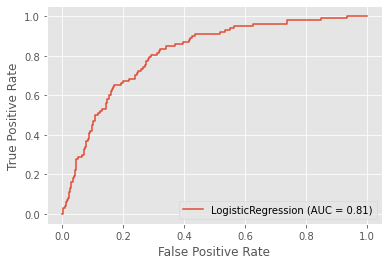

In [58]:
plot_roc_curve(lr, X_test, y_test)

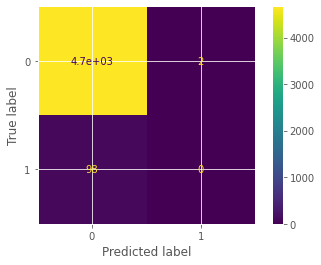

In [59]:
plot_confusion_matrix(lr, X_test, y_test)

In [43]:
import pickle
pickle.dump(clf, open('/model_bankrupt/final_prediction.pickle', 'wb'))

In [45]:
import requests
import json

url = 'http://0.0.0.0:5000/api/'

data = [[0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.1666,0.24976,497.42,0.73378,2.6349,0.24976,0.14942,43.37,1.2479,0.21402,0.11998,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.14942,94.14,3.8772,0.56393,0.21402,1.741,593.27,0.50591,0.12804,0.66295,0.051402,0.12804,114.42,71.05,1.0097,1.5225,49.394,0.1853,0.11085,2.042,0.37854,0.25792,2.2437,2.248,348690,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0]]
j_data = json.dumps(data)
headers = {'content-type': 'application/json', 'Accept-Charset': 'UTF-8'}
r = requests.post(url, data=j_data, headers=headers)
print(r, r.text)

KeyboardInterrupt: ignored

Tree


In [30]:
maxDepth = 20
kFold = 5
scores = np.zeros((maxDepth, kFold))

In [53]:
training_scores = np.zeros((maxDepth, 1))
testing_scores = np.zeros((maxDepth, 1))

for depth in np.arange(1, maxDepth + 1):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    training_scores[depth - 1] = clf.score(X_train, y_train)
    testing_scores[depth - 1] = clf.score(X_test, y_test)

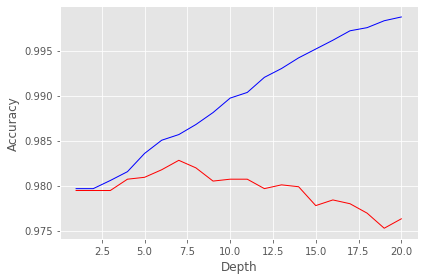

In [54]:
plt.style.use('ggplot')
plt.plot(range(1, maxDepth + 1), training_scores, 
         markersize=10, color='blue', lw=1, label='Training accuracy')
plt.plot(range(1, maxDepth + 1), testing_scores,
         markersize=10, color='red', lw=1, label='Testing accuracy')
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.tight_layout()

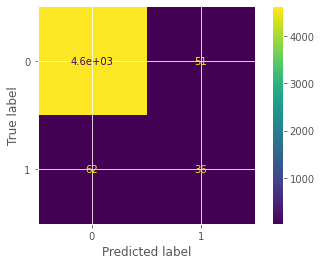

In [55]:
plot_confusion_matrix(clf, X_test, y_test)

In [33]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9794506185783183

Xgboost et h2o

In [34]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0gww38la
  JVM stdout: /tmp/tmp0gww38la/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0gww38la/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.3
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_3mzuqr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [35]:
# training
data = h2o.H2OFrame(train)

# paramètre pour h2o
data['bankruptcy'] = data['bankruptcy'].asfactor()
y = "bankruptcy"
cont_names = cont_names.tolist()
x = cont_names
aml = H2OAutoML(max_runtime_secs= 3600, max_models=60, sort_metric='AUC')
aml.train(x = x, y = y, training_frame = data)

# print
lb = aml.leaderboard
lb.head(rows=lb.nrows)

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20210110_093709_model_18,0.959193,0.0527902,0.554674,0.259439,0.114865,0.0131939
XGBoost_grid__1_AutoML_20210110_093709_model_12,0.957607,0.0609434,0.559817,0.260301,0.117296,0.0137584
XGBoost_grid__1_AutoML_20210110_093709_model_11,0.955058,0.0542004,0.534571,0.289225,0.115415,0.0133207
XGBoost_grid__1_AutoML_20210110_093709_model_7,0.954387,0.0544712,0.564447,0.275301,0.113941,0.0129825
XGBoost_grid__1_AutoML_20210110_093709_model_5,0.952548,0.0614605,0.516546,0.281455,0.119371,0.0142495
XGBoost_grid__1_AutoML_20210110_093709_model_13,0.948247,0.0577818,0.497544,0.278375,0.119771,0.0143451
XGBoost_3_AutoML_20210110_093709,0.947804,0.0569935,0.517015,0.278054,0.116909,0.0136676
XGBoost_grid__1_AutoML_20210110_093709_model_3,0.944059,0.0611038,0.47675,0.280878,0.119066,0.0141768
StackedEnsemble_AllModels_AutoML_20210110_093709,0.944041,0.061223,0.521668,0.258328,0.11686,0.0136562
XGBoost_grid__1_AutoML_20210110_093709_model_8,0.944016,0.0591309,0.467958,0.271604,0.119884,0.0143721


In [36]:
# faire les prédictions
hf = h2o.H2OFrame(test)
preds = aml.predict(hf)
preds = preds.as_data_frame()
preds['p_p0'] = np.exp(preds['p0'])
preds['p_p1'] = np.exp(preds['p1'])
preds['sm'] = preds['p_p1'] / (preds['p_p0'] + preds['p_p1'])

roc_auc_score(y_test, preds['sm'])

Parse progress: |█████████████████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


0.9703904683260587

Ce modèle a un accuracy de 97 %

In [37]:
aml.leader.summary()


Model Summary: 


,,number_of_trees
0,,78.0


In [38]:
h2o.save_model(aml.leader, path = "/model_bankrupt", force=True)

'/model_bankrupt/XGBoost_grid__1_AutoML_20210110_093709_model_18'

In [40]:
# enregistrer le model
saved_model = h2o.load_model('/model_bankrupt/XGBoost_grid__1_AutoML_20210110_093709_model_18')
saved_model

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20210110_093709_model_18


Model Summary: 


,,number_of_trees
0,,78.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0016385545356899652
RMSE: 0.04047906292998845
LogLoss: 0.010060965551206814
Mean Per-Class Error: 0.0002854492257189367
AUC: 0.9999958310680093
AUCPR: 0.9998029899337549
Gini: 0.9999916621360185

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3437839150428772: 


,,0,1,Error,Rate
0,0,14012.0,1.0,0.0001,(1.0/14013.0)
1,1,2.0,289.0,0.0069,(2.0/291.0)
2,Total,14014.0,290.0,0.0002,(3.0/14304.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.343784,0.994836,177.0
1,max f2,0.209540,0.994532,186.0
2,max f0point5,0.428721,0.997220,174.0
3,max accuracy,0.343784,0.999790,177.0
4,max precision,0.994137,1.000000,0.0
5,max recall,0.209540,1.000000,186.0
6,max specificity,0.994137,1.000000,0.0
7,max absolute_mcc,0.343784,0.994731,177.0
8,max min_per_class_accuracy,0.209540,0.999429,186.0
9,max mean_per_class_accuracy,0.209540,0.999715,186.0



Gains/Lift Table: Avg response rate:  2.03 %, avg score:  2.04 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010067,0.811163,49.154639,49.154639,1.000000,0.901830,1.000000,0.901830,0.494845,0.494845,4815.463918,4815.463918,0.494845
1,2,0.020064,0.425793,49.154639,49.154639,1.000000,0.675203,1.000000,0.788911,0.491409,0.986254,4815.463918,4815.463918,0.986254
2,3,0.030062,0.061198,1.374955,33.265116,0.027972,0.112886,0.676744,0.564094,0.013746,1.000000,37.495494,3226.511628,0.990081
3,4,0.040059,0.041528,0.000000,24.963351,0.000000,0.050676,0.507853,0.435963,0.000000,1.000000,-100.000000,2396.335079,0.979876
4,5,0.050056,0.029938,0.000000,19.977654,0.000000,0.035158,0.406425,0.355914,0.000000,1.000000,-100.000000,1897.765363,0.969671
5,6,0.100042,0.013671,0.000000,9.995807,0.000000,0.020101,0.203354,0.188125,0.000000,1.000000,-100.000000,899.580713,0.918647
6,7,0.150028,0.008040,0.000000,6.665424,0.000000,0.010349,0.135601,0.128894,0.000000,1.000000,-100.000000,566.542404,0.867623
7,8,0.200014,0.005242,0.000000,4.999650,0.000000,0.006445,0.101713,0.098292,0.000000,1.000000,-100.000000,399.965047,0.816599
8,9,0.300056,0.002362,0.000000,3.332712,0.000000,0.003631,0.067801,0.066731,0.000000,1.000000,-100.000000,233.271202,0.714479
9,10,0.400028,0.001201,0.000000,2.499825,0.000000,0.001717,0.050856,0.050483,0.000000,1.000000,-100.000000,149.982524,0.612431




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.013193867886438271
RMSE: 0.11486456323182652
LogLoss: 0.052790167347043726
Mean Per-Class Error: 0.1034952080579079
AUC: 0.9591933901338057
AUCPR: 0.5546740588203086
Gini: 0.9183867802676113

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15475979447364807: 


,,0,1,Error,Rate
0,0,13917.0,96.0,0.0069,(96.0/14013.0)
1,1,149.0,142.0,0.512,(149.0/291.0)
2,Total,14066.0,238.0,0.0171,(245.0/14304.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.154760,0.536862,157.0
1,max f2,0.046091,0.549117,246.0
2,max f0point5,0.319826,0.637910,104.0
3,max accuracy,0.319826,0.985039,104.0
4,max precision,0.983445,1.000000,0.0
5,max recall,0.000487,1.000000,390.0
6,max specificity,0.983445,1.000000,0.0
7,max absolute_mcc,0.154760,0.530998,157.0
8,max min_per_class_accuracy,0.012365,0.887676,323.0
9,max mean_per_class_accuracy,0.010507,0.896505,330.0



Gains/Lift Table: Avg response rate:  2.03 %, avg score:  1.33 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010067,0.289007,36.524628,36.524628,0.743056,0.621472,0.743056,0.621472,0.367698,0.367698,3552.462772,3552.462772,0.365057
1,2,0.020064,0.121025,14.780766,25.690578,0.300699,0.179468,0.522648,0.401240,0.147766,0.515464,1378.076563,2469.057797,0.505687
2,3,0.030062,0.073236,8.249730,19.890482,0.167832,0.093058,0.404651,0.298752,0.082474,0.597938,724.972965,1889.048190,0.579669
3,4,0.040059,0.052618,4.468604,16.041741,0.090909,0.061195,0.326353,0.239466,0.044674,0.642612,346.860356,1504.174088,0.615066
4,5,0.050056,0.041785,5.156081,13.867650,0.104895,0.046462,0.282123,0.200919,0.051546,0.694158,415.608103,1286.764960,0.657478
5,6,0.100042,0.017256,2.956153,8.415714,0.060140,0.026687,0.171209,0.113864,0.147766,0.841924,195.615313,741.571390,0.757289
6,7,0.150028,0.009866,1.581198,6.138604,0.032168,0.012968,0.124884,0.080248,0.079038,0.920962,58.119818,513.860359,0.786944
7,8,0.200014,0.006213,0.549982,4.741937,0.011189,0.007885,0.096470,0.062164,0.027491,0.948454,-45.001802,374.193653,0.763982
8,9,0.299986,0.002817,0.378113,3.287668,0.007692,0.004204,0.066884,0.042848,0.037801,0.986254,-62.188739,228.766755,0.700520
9,10,0.400028,0.001468,0.034350,2.474054,0.000699,0.002063,0.050332,0.032648,0.003436,0.989691,-96.565015,147.405384,0.601908




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.98378074,0.0035867954,0.9860189,0.9856694,0.9860189,0.9776302,0.98356646
1,auc,0.9592105,0.0070563247,0.951815,0.9513848,0.9660746,0.9626169,0.9641614
2,aucpr,0.5609639,0.054297317,0.62470496,0.50446844,0.5990537,0.50620526,0.5703871
3,err,0.016219255,0.0035867954,0.013981125,0.0143306535,0.013981125,0.0223698,0.016433567
4,err_count,46.4,10.261579,40.0,41.0,40.0,64.0,47.0
5,f0point5,0.6072647,0.0688893,0.6888889,0.61764705,0.6473214,0.5105105,0.57195574
6,f1,0.55793256,0.04550694,0.60784316,0.5060241,0.59183675,0.5151515,0.56880736
7,f2,0.52062297,0.053956192,0.54385966,0.42857143,0.5451128,0.5198777,0.56569344
8,lift_top_group,38.14769,4.563658,42.049747,38.365902,40.51909,30.355438,39.448277
9,logloss,0.052789826,0.0056018215,0.05228216,0.054101404,0.04808339,0.06158865,0.04789352



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-01-10 09:53:00,8 min 8.129 sec,0.0,0.500000,0.693147,0.500000,0.020344,1.000000,0.979656
1,,2021-01-10 09:53:00,8 min 8.446 sec,5.0,0.163122,0.155373,0.830437,0.357083,29.014891,0.019505
2,,2021-01-10 09:53:00,8 min 8.766 sec,10.0,0.121373,0.075209,0.948156,0.589156,36.865979,0.016499
3,,2021-01-10 09:53:01,8 min 9.147 sec,15.0,0.107335,0.049842,0.985031,0.770283,44.375716,0.010067
4,,2021-01-10 09:53:01,8 min 9.537 sec,20.0,0.095890,0.037720,0.993817,0.879732,47.789233,0.007411
5,,2021-01-10 09:53:02,8 min 9.924 sec,25.0,0.086310,0.030571,0.997071,0.937024,49.154639,0.005103
6,,2021-01-10 09:53:02,8 min 10.309 sec,30.0,0.077788,0.025469,0.998585,0.966633,49.154639,0.003216
7,,2021-01-10 09:53:02,8 min 10.665 sec,35.0,0.071072,0.021987,0.999124,0.979185,49.154639,0.002377
8,,2021-01-10 09:53:03,8 min 11.045 sec,40.0,0.065201,0.019195,0.999591,0.987439,49.154639,0.001888
9,,2021-01-10 09:53:03,8 min 11.422 sec,45.0,0.060137,0.017046,0.999784,0.992410,49.154639,0.001398



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,operating expenses / total liabilities,356.100983,1.000000,0.085381
1,[(cash + short-term securities + receivables - short-term liabilit...,345.287720,0.969634,0.082788
2,gross profit (in 3 years) / total assets,242.812286,0.681864,0.058218
3,total costs /total sales,208.338486,0.585055,0.049952
4,(net profit + depreciation) / total liabilities,204.335556,0.573814,0.048993
5,(current assets - inventory) / short-term liabilities,200.041382,0.561755,0.047963
6,(sales - cost of products sold) / sales,169.985748,0.477353,0.040757
7,profit on sales / sales,136.374496,0.382966,0.032698
8,profit on sales / total assets,102.174843,0.286927,0.024498
9,profit on operating activities / sales,98.228188,0.275844,0.023552



See the whole table with table.as_data_frame()


In [41]:
# prédiction
test_predicted = saved_model.predict(hf)

test_predicted

xgboost prediction progress: |████████████████████████████████████████████| 100%


predict,p0,p1
0,0.993481,0.00651948
0,0.998547,0.00145341
0,0.999613,0.000387089
0,0.997256,0.00274449
0,0.999822,0.000178296
0,0.993486,0.00651415
0,0.999936,6.38978e-05
0,0.999934,6.63581e-05
0,0.934311,0.0656894
0,0.999375,0.00062453


In [ ]:
accuracy_xgb = accuracy_score(y_test, test_predicted, normalize=True)

predict,p0,p1
0,0.999598,0.000401778
0,0.999952,4.847e-05
0,0.999878,0.000122457
0,0.999871,0.00012855
0,0.997624,0.00237578
0,0.997573,0.00242679
0,0.999958,4.16263e-05
0,0.998762,0.00123838
0,0.999888,0.00011246
0,0.999962,3.76646e-05


ValueError: ignored

In [60]:
# fermer la session
h2o.shutdown()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  


H2O session _sid_8b3f closed.


In [61]:
df_all_year.shape

(19073, 65)

Etape 5 : API (voir sur Linear Regression)